<a href="https://colab.research.google.com/github/katherinekarababas/sodapop-em/blob/master/Mass_Distribution_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/katherinekarababas/sodapop-em.git #download code repository from my GitHub account 

mkdir /opt/bin /opt/lib/ /opt/lib/python3.7 /opt/lib/python3.7/site-packages #create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

cd sodapop-em #install code
# git pull 
python3 setup.py install --prefix /opt/

python3 -m pip install emcee #install emcee package to handle markov-chain monte carlo sampling

echo -e '\n *** \n'

sample-pop-params -h #executable that draws samples in the population model's parameters

echo -e '\n *** \n'

infer-pop-params-em -h #executable that calculates the posterior probability of the sampled population parameters

echo -e '\n *** \n'

build-ppd -h #executable that postprocesses the population posterior samples to calculate the inferred mass distribution

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
writing sodapop.egg-info/PKG-INFO
writing dependency_links to sodapop.egg-info/dependency_links.txt
writing top-level names to sodapop.egg-info/top_level.txt
writing manifest file 'sodapop.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/parameters.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/select.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/priors.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/emcee.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/diagnostics.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/__init__.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/populations.py -> build/bdist.linux-x86_64/egg/sodapop
byte-compiling

fatal: destination path 'sodapop-em' already exists and is not an empty directory.
mkdir: cannot create directory ‘/opt/bin’: File exists
mkdir: cannot create directory ‘/opt/lib/’: File exists
mkdir: cannot create directory ‘/opt/lib/python3.7’: File exists
mkdir: cannot create directory ‘/opt/lib/python3.7/site-packages’: File exists
zip_safe flag not set; analyzing archive contents...


In [37]:
# cell to run changes in sodapop packages faster
%%bash 

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

cd sodapop-em # install code
git pull
python3 setup.py install --prefix /opt/

Already up to date.
running install
running bdist_egg
running egg_info
writing sodapop.egg-info/PKG-INFO
writing dependency_links to sodapop.egg-info/dependency_links.txt
writing top-level names to sodapop.egg-info/top_level.txt
writing manifest file 'sodapop.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying sodapop/emcee_new.py -> build/lib/sodapop
copying sodapop/emcee.py -> build/lib/sodapop
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/parameters.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/emcee_new.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/select.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/priors.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/emcee.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/diagnostics.py -> build/bdist.lin

zip_safe flag not set; analyzing archive contents...


In [38]:
# likelihoods for galactic NS-NS pulsar binary with Gaussian mass measurements

import numpy as np

psr_mass = np.array ([1.559, 1.174, 1.291, 1.322, 1.3332, 1.3452, 1.4398, 1.3886, 1.358, 1.354, 1.3381, 1.2489, 1.312, 1.258, 1.3655, 1.2064]) # pulsar mass
psr_sd = np.array ([0.004, 0.004, 0.011, 0.011, 0.0010, 0.0010, 0.0002, 0.0002, 0.010, 0.010, 0.0007, 0.0007, 0.017, 0.017, 0.0021, 0.0020]) # standard deviation
psr_name = ['J0453+1559', 'J0453+1559_comp.', 'J1906+0746', 'J190+0746_comp.', 'B1534+12', 'B1534+12_comp.', 'B1913+16', 'B1913+16_comp.', 'B2127+11C', 'B2127+11C_comp.', 'J0737-3039A', 'J0737-3039B', 'J1756-2251', 'J1756-2251_comp.', 'J1807-2500B', 'J1807-2500B_comp.'] # pulsar name

wts = np.ones(100) #need to include this as equal likelihoods for each sample

for i in range(0,16):
  mu, sigma = psr_mass[i], psr_sd[i] # psr mass and sd respectively
  s = np.random.normal(mu, sigma, 100) # likelihood samples 
  np.savetxt('psr_'+psr_name[i]+'.csv', np.column_stack([s,wts]), delimiter=',', header='m,likelihood', comments ='')

In [63]:
# likelihoods for galactic NS-NS pulsar binary with known mass function and total mass

def likelihood_tm(m_total, m_psr, m_func, m_mean, mt_un): # equation 4 from A Population-Informed Mass Estimate for Pulsar J0740+6620 paper
    return np.exp(-(m_total-m_mean)**2/(2*mt_un**2))*m_total**(4/3)/(3*(m_total-m_psr)**2*m_func**(1/3)*(1-(m_func**(2/3)*m_total**(4/3))/(m_total-m_psr)**2)**(1/2))

m_func = 0.136344 # mass function
m_mean = 2.875 # total mass
mt_un = 0.014 # uncertainty in total mass 
psr_mt_name = ['J1913+1102'] # pulsar name

mt_samples = np.random.normal(m_mean, mt_un, 100) # likelihood samples for the total mass 
psr_samples = np.random.uniform(1., 1.8, 100) # likelihood samples for the pulsar mass

tm_like = []
for i,j in zip(mt_samples, psr_samples):
  tm_like += [likelihood_tm(i, j, m_func, m_mean, mt_un)] # probabilities of pulsar masses given the defined values

samples = np.random.choice(range(100), 100, True, tm_like/np.sum(tm_like)) # likelihood samples

total_likes = []
for index in samples:
  test = [mt_samples[index], psr_samples[index]]
  total_likes = np.append (total_likes, test)
like_t = np.reshape(total_likes, (100,2)) # this is a 2D array of the total masses and the pulsar masses 
np.savetxt('psr_mt_'+psr_mt_name[k]+'.csv', np.column_stack([like_t,wts]), delimiter=',', header='tm, m, likelihood', comments ='') # final .csv file

In [64]:
# population inference

# observations
PATH = './' 
g_likelihood = ','.join(['psr_'+psr_name[i]+'.csv' for i in range(0,16)]) # gaussian pulsars
mt_likelihood = ','.join(['psr_mt_'+psr_mt_name[i]+'.csv' for i in range(0,1)]) # total mass pulsars
likelihood = g_likelihood + ',' + mt_likelihood # list of all types of likelihoods

dat_type = 'psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr' # all pulsars are the same data type
likelihood_num = 100 

# population model using the power law in masses where the convention is m1 >= m2
pop_mod = 'peakcut_mass' #don't need two masses anymore 
cb_mod = 'unif_m1_peakcut_m2_qpair' #this doesn't matter anymore; it has no effect on the data we just kept it to not mess with the population parameters and inference cells 
pop_param = 'mmin,mmax+flat12,1.,1.5,1.5,3. mu+flat,1.,3. sigma+flat,0.01,2.' 
mcmc_start = 'mmin,mmax+flat12,1.,1.2,1.8,2.4 mu+flat,1.,1.5 sigma+flat,0.2,0.7' # look into paper to reproduce results they get

# selection effect (we don't know for pulsar data so we don't use this)
chirp_mass = 'False' #defult to no selection effect 
samp_num = 1000 #number of samples to use for monte carlo calculation of detection fraction

# mcmc algorithm
walks = 10 #number of walkers for mcmc
post_samp = 1000 #only start saving posterior samples after this number of steps
post_num = 10000 #number of posterior samples to aim for; added more so there are more dots on the corner plot

# postprocessing
pop_num = 1000 #how many population models to average when computing inferred mass distribution

In [65]:
# draw population parameter samples from model

%%bash -s "$pop_mod" "$walks" "$mcmc_start"
# this cell is a separate terminal instance; with the -s option we are passing the variables we defined above into the terminal as $1,$2,...

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

sample-pop-params $1 -n $2 -p $3 -o ${1}_prior.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# sample-pop-params [population model] -n [number of mcmc walkers] -p [distribution to draw population parameters from] -o [path where population samples should be output]

In [66]:
# do the population inference based on the pulsar data

%%bash -s "$likelihood" "$pop_mod" "$PATH" "$cb_mod" "$dat_type" "$likelihood_num" "$pop_param" "$chirp_mass" "$samp_num" "$post_num" "$walks" "$post_samp"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

IFS=',' read -r -a likes <<< "$1" # some bash magic to turn the lists into arrays
IFS=',' read -r -a classes <<< "$5" 

echo "$2"
infer-pop-params-em ${2}_prior.csv $(for like in "${likes[@]}"; do echo -n "${3}/${like} "; done) -p $2 -C ${classes[@]} -c m -l $6 -P $7 -B 3. 60. 0. -f $8 -s $9 -t ${10} -w ${11} -b ${12} -o ${2}.csv --diag -v # call the executable that runs the mcmc algorithm
# infer-pop-params [prior samples] [likelihood1 likelihood2 ...] -p [bns_pop_model nsbh_pop_model] -C [psr  ...] -c [likelihood column names] -l [number of likelihood samples] -P [prior distribution] -B [fixed black hole population parameters] -f [selection function] -s [number of selection samples] -t [number of posterior samples] -w [number of walkers] -b [number of burn-in samples] -o [path where posterior samples should be output]

peakcut_mass
walkers: 10, burn in: 1000, target posterior samples: 10000, likelihood samples: 100, selection effect samples: 1000
Loading likelihood data...
.//psr_J0453+1559.csv
.//psr_J0453+1559_comp..csv
.//psr_J1906+0746.csv
.//psr_J190+0746_comp..csv
.//psr_B1534+12.csv
.//psr_B1534+12_comp..csv
.//psr_B1913+16.csv
.//psr_B1913+16_comp..csv
.//psr_B2127+11C.csv
.//psr_B2127+11C_comp..csv
.//psr_J0737-3039A.csv
.//psr_J0737-3039B.csv
.//psr_J1756-2251.csv
.//psr_J1756-2251_comp..csv
.//psr_J1807-2500B.csv
.//psr_J1807-2500B_comp..csv
.//psr_mt_J1913+1102.csv
emcee ran for 61.42730641365051 seconds
autocorrelation lengths for population parameters are [424.49828158 589.57704718 269.92587799 473.57994984]
number of independent samples is 170
effective samples per second is 2


/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:28: RuntimeWarning: divide by zero encountered in log
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:12: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/populations.py:97: RuntimeWarning: divide by zero encountered in true_divide
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/populations.py:97: RuntimeWarning: invalid value encountered in true_divide
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 220;
tau: [424.49828158 589.57704718 269.92587799 473.57994984]


In [67]:
# calculate the inferred mass distribution from the population posterior samples

%%bash -s "$pop_mod" "$samp_num" "$chirp_mass" "$pop_num"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

build-ppd-em ${1}.csv -p $1 -s $2 -f $3 -m $4 -o ${1}_ppd.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# build-ppd [posterior samples] -p [population model] -s [number of selection effect samples] -f [selection function] -m [number of population models to average] -o [path where inferred mass distribution should be output]

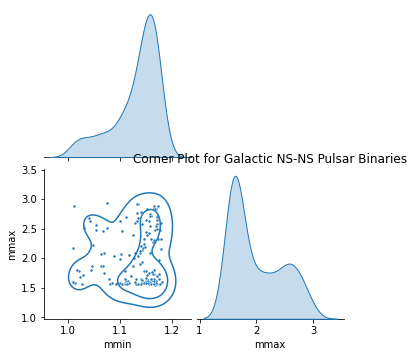

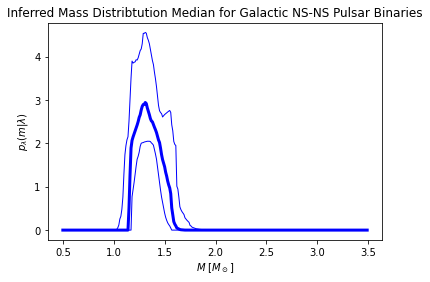

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#corner plot

post_dat = np.genfromtxt(pop_mod+'.csv',delimiter=',',names=True,dtype=None)

params = post_dat.dtype.names[2:4] 
post = np.column_stack([post_dat[param] for param in params]) 
post_frame = pd.DataFrame(post,columns=params)

fig = sns.pairplot(post_frame, kind='scatter', markers='.', diag_kind='kde', corner=True, diag_kws=dict(lw=1,common_norm=False))
fig.map_lower(sns.kdeplot, levels=[0.1,0.5]) 

plt.title ('Corner Plot for Galactic NS-NS Pulsar Binaries')
plt.show()

ppd_data = np.genfromtxt(pop_mod+'_ppd.csv',delimiter=',',names=True,dtype=None) 

colours = plt.rcParams['axes.prop_cycle'].by_key()['color'] # pyplot magic to get default colours

plt.plot(ppd_data['m'],ppd_data['med'],lw=3, color='b') # inferred mass distribution median 
plt.plot(ppd_data['m'],ppd_data['ub'],lw=1, color='b') #upper error bound
plt.plot(ppd_data['m'],ppd_data['lb'],lw=1, color='b') #lower error bound

plt.title ('Inferred Mass Distribtution Median for Galactic NS-NS Pulsar Binaries')
plt.xlabel(r'$M$ [$M_\odot$]')
plt.ylabel(r'$p_\lambda(m|\lambda)$')
plt.show()

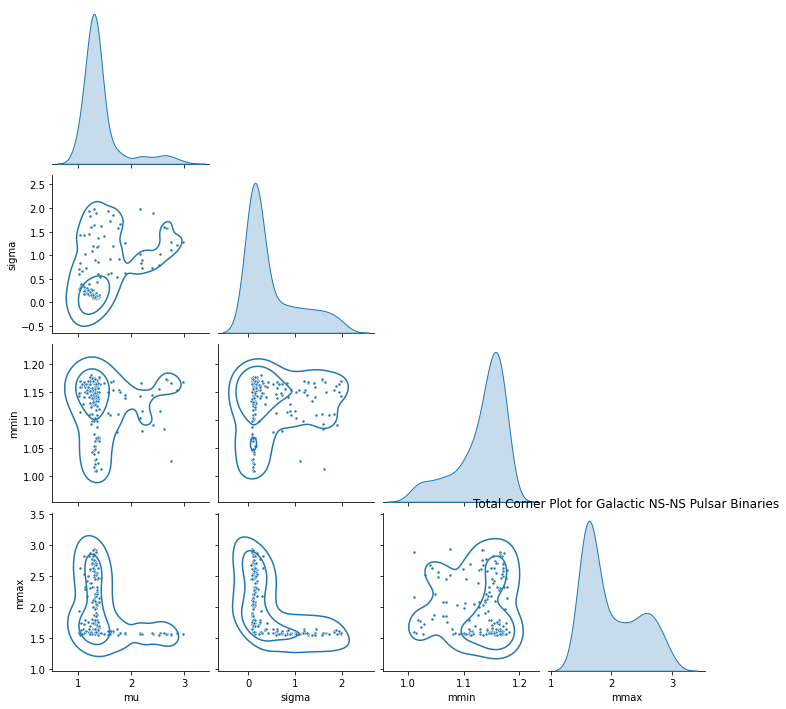

In [69]:
post_dat = np.genfromtxt(pop_mod+'.csv',delimiter=',',names=True,dtype=None)

params = post_dat.dtype.names[:-3] 
post = np.column_stack([post_dat[param] for param in params]) 
post_frame = pd.DataFrame(post,columns=params)

fig = sns.pairplot(post_frame, kind='scatter', markers='.', diag_kind='kde', corner=True, diag_kws=dict(lw=1,common_norm=False))
fig.map_lower(sns.kdeplot, levels=[0.1,0.5]) 

plt.title ('Total Corner Plot for Galactic NS-NS Pulsar Binaries')
plt.show()